- Row ID: Unique ID for each row.
- Order ID: Unique Order ID for each Customer.
- Order Date: Order Date of the product.
- Ship Date: Shipping Date of the Product.
- Ship Mode: Shipping Mode specified by the Customer.
- Customer ID: Unique ID to identify each Customer.
- Customer Name: Name of the Customer.
- Segment: The segment where the Customer belongs.
- Country: Country of residence of the Customer.
- City: City of residence of the Customer.
- State: State of residence of the Customer.
- Postal Code: Postal Code of every Customer.
- Region: Region where the Customer belongs.
- Product ID: Unique ID of the Product.
- Category: Category of the product ordered.
- Sub-Category: Sub-Category of the product ordered.
- Product Name: Name of the Product.
- Sales: Sales of the Product.
- Quantity: Quantity of the Product.
- Discount: Discount provided.
- Profit: Profit/Loss incurred.


1. Which states have the most sales?

In [2]:
pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import numpy as np # linear algebra
import pandas as pd
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

import datetime

import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd

df = pd.read_excel(
    r'C:\Users\Kered\Documents\PSTB-School_Certifications_2026\BootCamps_Gen-AI-\W2\Projet_Data_analysis\US Superstore data.xls')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

2. What is the difference between New York and California in terms of sales and profit? (Compare the total sales and profit between New York and California.)


In [21]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

df['OrderY']=df['Order Date'].dt.year
df['OrderM']=df['Order Date'].dt.month
df['OrderD']=df['Order Date'].dt.day

df['Profitability']=df['Profit']/df['Sales']

In [23]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,OrderY,OrderM,OrderD,Profitability
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,0.1125


### 3. Which countries do they have sales?

In [26]:
df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(20)

Country
United States    2.297201e+06
Name: Sales, dtype: float64

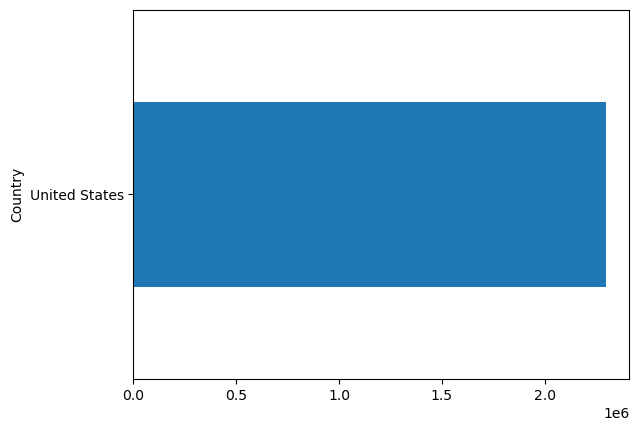

In [25]:
df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(20).plot.barh()
plt.show()

### 4. Compare the total sales and profit between New York and California

In [27]:
df_cal=df[df['State']=='California']
df_new=df[df['State']=='New York']

### 5. Who is an outstanding customer in New York?

In [28]:
df_cal_customer=pd.DataFrame(df_cal.groupby('Customer Name')['Sales'].sum())
df_cal_customer['Profit']=pd.DataFrame(df_cal.groupby('Customer Name')['Profit'].sum())


### 6. Can we apply Pareto principle to customers and Profit ?